Reward Systems

In [17]:
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# import gym
# from gym.spaces import Discrete


# class FraudDetectionEnv:
#     def __init__(self, data, max_steps=100, reward_system="baseline"):
#         self.data = data
#         self.max_steps = max_steps
#         self.current_step = 0
#         self.reward_system = reward_system
#         self.action_space = Discrete(2)  # 2 actions: Fraud (1) or Not Fraud (0)
#         self.edge_index = self.create_graph_edges()  # Placeholder for graph edges

#     def create_graph_edges(self):
#         """
#         Generates a simple edge list connecting transactions.
#         This is a placeholder—replace with real graph structure.
#         """
#         num_nodes = len(self.data)
#         edge_index = np.random.randint(0, num_nodes, (2, num_nodes // 2))  # Example random connections
#         return edge_index

#     def reset(self):
#         """
#         Resets the environment for a new episode.
#         Selects a random starting point in the dataset.
#         Returns: Initial state (excluding the target column).
#         """
#         self.current_step = 0
#         self.current_index = np.random.randint(0, len(self.data) - self.max_steps)
#         return self.data.iloc[self.current_index, :-1].values.astype(np.float32)  # Exclude target column

#     def step(self, action):
#         """
#         Executes an action in the environment and returns the next state, reward, and termination flag.
#         """
#         row = self.data.iloc[self.current_index]
#         is_fraud = int(row['isFraud'])  # Ensure 'isFraud' is an integer (binary)

#         reward = self.calculate_reward(action, is_fraud, row)

#         self.current_step += 1
#         done = self.current_step >= self.max_steps or self.current_index >= len(self.data) - 1
#         self.current_index += 1

#         # Get the next state or None if done
#         next_state = (
#             self.data.iloc[self.current_index, :-1].values.astype(np.float32) if not done else None
#         )
#         return next_state, reward, done, {}

#     def calculate_reward(self, action, is_fraud, row):
#         """
#         Computes the reward for the agent based on its action and the true fraud label.
#         """

#         if self.reward_system == "new_reward_system":
#             if action == 1 and is_fraud == 1:  # True Positive (Correct Fraud Detection)
#                 return 10
#             elif action == 1 and is_fraud == 0:  # False Positive (Wrong Fraud Detection)
#                 return -3
#             elif action == 0 and is_fraud == 1:  # False Negative (Missed Fraud)
#                 return -10
#             else:  # True Negative (Legit Transaction)
#                 return 1

#         # **Baseline Reward System**
#         if self.reward_system == "baseline":
#             if action == 1 and is_fraud == 1:  # True positive
#                 return 1.0
#             elif action == 1 and is_fraud == 0:  # False positive
#                 return -0.5
#             elif action == 0 and is_fraud == 1:  # False negative
#                 return -2.0
#             else:  # True negative
#                 return 0.5

#         # **Penalty for False Negatives**
#         elif self.reward_system == "penalty_for_false_negatives":
#             if action == 1 and is_fraud == 1:
#                 return 1.0
#             elif action == 1 and is_fraud == 0:
#                 return -0.3
#             elif action == 0 and is_fraud == 1:
#                 return -3.0  # Stronger penalty for false negatives
#             else:
#                 return 0.5

#         # **Intermediate Rewards for Suspicious Patterns**
#         elif self.reward_system == "intermediate_rewards":
#             reward = 0
#             if action == 1 and is_fraud == 1:
#                 reward = 2.0
#             elif action == 1 and is_fraud == 0:
#                 reward = -2.0  # Stronger penalty for incorrect fraud detection
#             elif action == 0 and is_fraud == 1:
#                 reward = -3.0
#             else:
#                 reward = 1.0  # Reward for correctly classifying legit transactions

#             # Add bonus for detecting suspicious patterns
#             if action == 1 and row['amount_to_balance_ratio'] > 0.8:
#                 reward += 0.2
#             return reward

#         # **Dynamic Reward Scaling**
#         elif self.reward_system == "dynamic_scaling":
#             if action == 1 and is_fraud == 1:  # True Positive
#                 return 2.0  # More reward for correct fraud detection
#             elif action == 1 and is_fraud == 0:  # False Positive
#                 return -1.0  # Slightly higher penalty
#             elif action == 0 and is_fraud == 1:  # False Negative
#                 return -3.0  # Increase penalty (but less extreme than before)
#             else:  # True Negative
#                 return 1.0  # Higher reward for correct classification


In [18]:
# class FraudDetectionEnv:
#     def __init__(self, data, max_steps=100, reward_system="paper_reward"):
#         self.data = data
#         self.max_steps = max_steps
#         self.current_step = 0
#         self.reward_system = reward_system
#         self.action_space = 2  # Approve (0) or Flag as Fraud (1)

#     def reset(self):
#         self.current_step = 0
#         self.current_index = np.random.randint(0, len(self.data) - self.max_steps)
#         return self.data.iloc[self.current_index, :-1].values.astype(np.float32)  # Exclude target column

#     def step(self, action):
#         row = self.data.iloc[self.current_index]
#         is_fraud = int(row['isFraud'])

#         # Apply the paper's reward function
#         reward = self.calculate_reward(action, is_fraud)

#         self.current_step += 1
#         done = self.current_step >= self.max_steps or self.current_index >= len(self.data) - 1
#         self.current_index += 1

#         next_state = (
#             self.data.iloc[self.current_index, :-1].values.astype(np.float32) if not done else None
#         )
#         return next_state, reward, done, {}

#     def calculate_reward(self, action, is_fraud):
#         """
#         Implements the paper's reward system.
#         """
#         if self.reward_system == "paper_reward":
#             if action == 1 and is_fraud == 1:   # True Positive
#                 return +10
#             elif action == 1 and is_fraud == 0: # False Positive
#                 return -2
#             elif action == 0 and is_fraud == 1: # False Negative (Missed Fraud)
#                 return -20
#             else:  # True Negative
#                 return +1


In [19]:
import numpy as np
import pandas as pd
import random

class FraudDetectionEnv:
    def __init__(self, data, max_steps=100, reward_system="paper_reward"):
        """
        Initializes the fraud detection environment.
        
        Parameters:
        - data: A preprocessed pandas DataFrame containing features and a target column 'isFraud'.
        - max_steps: Maximum number of transactions (steps) per episode.
        - reward_system: Type of reward function to use. "paper_reward" applies asymmetric rewards.
        """
        self.data = data.reset_index(drop=True)
        self.max_steps = max_steps
        self.reward_system = reward_system
        self.current_step = 0
        self.index_order = []  # Shuffled indices for the current episode
        self.current_index = None  # Pointer into index_order

    def reset(self):
        """
        Resets the environment for a new episode.
        Shuffles the data and returns the first state.
        """
        self.current_step = 0
        self.index_order = self.data.index.tolist()
        random.shuffle(self.index_order)
        self.current_index = 0
        state = self.data.loc[self.index_order[self.current_index]].drop('isFraud').values.astype(np.float32)
        return state

    def step(self, action):
        """
        Takes an action on the current transaction and returns:
            - next state,
            - reward,
            - done flag,
            - info dictionary (empty).
        """
        # Get the current row and its true label
        row = self.data.loc[self.index_order[self.current_index]]
        true_label = int(row['isFraud'])
        
        # Calculate reward using the modified reward system
        reward = self.calculate_reward(action, true_label)
        
        self.current_step += 1
        self.current_index += 1
        
        # Episode ends if max_steps reached or data exhausted
        done = (self.current_step >= self.max_steps) or (self.current_index >= len(self.data))
        
        if not done:
            state = self.data.loc[self.index_order[self.current_index]].drop('isFraud').values.astype(np.float32)
        else:
            state = np.zeros(self.data.shape[1] - 1, dtype=np.float32)
        
        return state, reward, done, {}

    def calculate_reward(self, action, true_label):
        """
        Computes the reward for the agent's action based on the true label.
        
        Modified reward system:
            - True Positive (action=1, fraud=1): +10
            - False Positive (action=1, fraud=0): -15
            - False Negative (action=0, fraud=1): -20
            - True Negative (action=0, fraud=0): +5
        """
        if self.reward_system == "paper_reward":
            if action == 1 and true_label == 1:   # True Positive
                return +10
            elif action == 1 and true_label == 0:  # False Positive
                return -15
            elif action == 0 and true_label == 1:  # False Negative
                return -20
            else:  # True Negative
                return +5
        else:
            return 1 if action == true_label else -1


Exploration Strategies

In [20]:
import numpy as np
import tensorflow as tf


class ExplorationStrategy:
    def __init__(self):
        self.epsilon = 1.0  # Initial epsilon for epsilon-greedy
        self.epsilon_min = 0.1  # Minimum epsilon
        self.epsilon_decay = 0.995  # Decay rate for epsilon

    def apply(self, strategy, action_probs=None, action_space=None):
        """
        Apply the specified exploration strategy.
        :param strategy: Name of the exploration strategy to use.
        :param action_probs: Action probabilities from the policy network (for actor-based methods).
        :param action_space: Action space object (for random actions).
        :return: Selected action.
        """
        if strategy == "epsilon_greedy":
            return self.epsilon_greedy(action_probs, action_space)
        elif strategy == "entropy_regularization":
            return self.entropy_regularization(action_probs)
        elif strategy == "boltzmann_exploration":
            return self.boltzmann_exploration(action_probs)
        elif strategy == "noisy_networks":
            return self.noisy_networks(action_probs)
        else:
            raise ValueError(f"Unknown exploration strategy: {strategy}")

    def epsilon_greedy(self, action_probs, action_space):
        """
        Epsilon-Greedy strategy: Selects random action with probability epsilon,
        otherwise selects the best action.
        :param action_probs: Action probabilities from the policy network.
        :param action_space: Action space for random sampling.
        :return: Selected action.
        """
        if np.random.rand() < self.epsilon:
            action = np.random.choice(action_space.n)  # Random action
        else:
            action = tf.argmax(action_probs, axis=-1).numpy()  # Best action
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)  # Decay epsilon
        return action

    def entropy_regularization(self, action_probs):
        """
        Entropy Regularization: Encourages stochastic exploration by sampling from
        the action distribution.
        :param action_probs: Action probabilities from the policy network.
        :return: Selected action.
        """
        action_dist = tf.keras.activations.softmax(action_probs)
        action = np.random.choice(len(action_probs), p=action_dist.numpy())  # Sample action
        return action

    def boltzmann_exploration(self, action_probs):
        """
        Boltzmann Exploration: Selects actions based on a temperature-scaled probability distribution.
        :param action_probs: Action probabilities from the policy network.
        :return: Selected action.
        """
        temperature = 1.0  # Temperature parameter
        scaled_probs = tf.nn.softmax(action_probs / temperature)
        action = np.random.choice(len(action_probs), p=scaled_probs.numpy())  # Sample action
        return action

    def noisy_networks(self, action_probs):
        """
        Noisy Networks: Adds noise to the network output to encourage exploration.
        :param action_probs: Action probabilities from the policy network.
        :return: Selected action.
        """
        noise = tf.random.normal(shape=tf.shape(action_probs), mean=0.0, stddev=0.1)
        noisy_action_probs = action_probs + noise
        return tf.argmax(noisy_action_probs, axis=-1).numpy()


Class for Most Promising Algorithms


In [21]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
import numpy as np


class BaseAlgorithm:
    """Base class for all RL algorithms."""
    def __init__(self, actor, critic=None, gamma=0.99):
        """
        :param actor: The policy network (actor).
        :param critic: The value network (critic), optional for some algorithms.
        :param gamma: Discount factor for rewards.
        """
        self.actor = actor
        self.critic = critic
        self.gamma = gamma

    def train(self, env, exploration_strategy):
        """General training loop. To be overridden by subclasses."""
        raise NotImplementedError("Train method must be implemented by subclasses.")



class ActorCriticAlgorithm:
    """
    Actor-Critic algorithm implemented with TensorFlow/Keras.
    """

    def __init__(self, actor, critic, lr_actor=0.01, lr_critic=0.01, gamma=0.99):
        """
        :param actor: The policy network (actor).
        :param critic: The value network (critic).
        :param lr_actor: Learning rate for the actor.
        :param lr_critic: Learning rate for the critic.
        :param gamma: Discount factor for rewards.
        """
        self.actor = actor
        self.critic = critic
        self.gamma = gamma

        # Optimizers
        self.actor_optimizer = Adam(learning_rate=lr_actor)
        self.critic_optimizer = Adam(learning_rate=lr_critic)

        # Loss function for the critic
        self.critic_loss_fn = MeanSquaredError()

    def train(self, env, exploration_instance, exploration_strategy):
        """
        Train the Actor-Critic agent.
        :param env: The environment.
        :param exploration_instance: Instance of ExplorationStrategy.
        :param exploration_strategy: Name of the exploration strategy to use.
        :return: Total rewards collected during training.
        """
        state = env.reset()
        done = False
        rewards = []
        log_probs = []
        values = []
        states = []
        actions = []

        while not done:
            # Convert state to a TensorFlow tensor
            state_tensor = tf.convert_to_tensor([state], dtype=tf.float32)
            states.append(state_tensor)

            # Get action probabilities from actor
            action_probs = self.actor(state_tensor)

            # Select an action based on the exploration strategy
            action = exploration_instance.apply(exploration_strategy, action_probs.numpy(), env.action_space)
            actions.append(action)

            # Get value estimate from critic
            value = self.critic(state_tensor)
            values.append(value)

            # Compute log probability of the selected action
            action_dist = tf.keras.activations.softmax(action_probs)
            log_prob = tf.math.log(action_dist[0, action])
            log_probs.append(log_prob)

            # Step the environment
            next_state, reward, done, _ = env.step(action)
            rewards.append(reward)
            state = next_state if not done else None

        # Convert lists to tensors
        values = tf.squeeze(tf.stack(values))
        log_probs = tf.stack(log_probs)

        # Compute discounted returns
        returns = self.compute_discounted_returns(rewards)
        advantages = returns - values

        # Update Actor
        with tf.GradientTape() as actor_tape:
            states_tensor = tf.stack(states)
            action_probs_new = self.actor(states_tensor)
            action_dist_new = tf.keras.activations.softmax(action_probs_new)
            log_probs_new = tf.math.log(action_dist_new[:, actions])

            # Compute Actor Loss using Policy Gradient
            actor_loss = -tf.reduce_mean(log_probs_new * advantages)

        actor_grads = actor_tape.gradient(actor_loss, self.actor.trainable_variables)
        self.actor_optimizer.apply_gradients(zip(actor_grads, self.actor.trainable_variables))

        # Update Critic
        with tf.GradientTape() as critic_tape:
            critic_loss = self.critic_loss_fn(returns, values)

        critic_grads = critic_tape.gradient(critic_loss, self.critic.trainable_variables)
        self.critic_optimizer.apply_gradients(zip(critic_grads, self.critic.trainable_variables))

        return sum(rewards)

    def compute_discounted_returns(self, rewards):
        """
        Compute discounted returns for a list of rewards.
        :param rewards: List of rewards from the episode.
        :return: Tensor of discounted returns.
        """
        returns = []
        G = 0
        for r in reversed(rewards):
            G = r + self.gamma * G
            returns.insert(0, G)
        return tf.convert_to_tensor(returns, dtype=tf.float32)


class PPOAlgorithm:
    """Proximal Policy Optimization (PPO) algorithm for TensorFlow/Keras."""

    def __init__(self, actor, critic, lr_actor=0.0003, lr_critic=0.0003, gamma=0.99, clip_epsilon=0.2):
        """
        :param actor: The policy network (actor).
        :param critic: The value network (critic).
        :param lr_actor: Learning rate for the actor.
        :param lr_critic: Learning rate for the critic.
        :param gamma: Discount factor for rewards.
        :param clip_epsilon: Clipping parameter for PPO updates.
        """
        self.actor = actor
        self.critic = critic
        self.gamma = gamma
        self.clip_epsilon = clip_epsilon
        
        # TensorFlow/Keras optimizers
        self.actor_optimizer = Adam(learning_rate=lr_actor)
        self.critic_optimizer = Adam(learning_rate=lr_critic)
        
        # Loss function for the critic
        self.critic_loss_fn = MeanSquaredError()

    def train(self, env, exploration_strategy, exploration_name="epsilon_greedy"):
        state = env.reset()
        done = False
        rewards = []
        log_probs_old = []
        values = []
        states = []
        actions = []

        while not done:
            # Convert state to TensorFlow tensor
            state_tensor = tf.convert_to_tensor([state], dtype=tf.float32)
            states.append(state_tensor)

            # Actor: Get action probabilities
            action_probs = self.actor(state_tensor)
            action = exploration_strategy.apply(exploration_name, action_probs.numpy(), env.action_space)
            actions.append(action)

            # Critic: Get state value
            value = self.critic(state_tensor)
            values.append(value)

            # Compute log probabilities
            action_dist = tf.keras.activations.softmax(action_probs)
            log_prob = tf.math.log(action_dist[0, action])
            log_probs_old.append(log_prob)

            # Step the environment
            next_state, reward, done, _ = env.step(action)
            rewards.append(reward)
            state = next_state if not done else None

        # Convert to tensors
        values = tf.squeeze(tf.stack(values))
        log_probs_old = tf.stack(log_probs_old)

        # Compute discounted returns
        returns = self.compute_discounted_returns(rewards)
        advantages = returns - values

        # PPO Policy Update
        with tf.GradientTape() as actor_tape:
            states_tensor = tf.stack(states)
            action_probs_new = self.actor(states_tensor)
            action_dist_new = tf.keras.activations.softmax(action_probs_new)
            log_probs_new = tf.math.log(action_dist_new[:, actions])

            # Compute PPO clipped objective
            ratio = tf.exp(log_probs_new - log_probs_old)
            surr1 = ratio * advantages
            surr2 = tf.clip_by_value(ratio, 1 - self.clip_epsilon, 1 + self.clip_epsilon) * advantages
            actor_loss = -tf.reduce_mean(tf.minimum(surr1, surr2))

        # Update Actor
        actor_grads = actor_tape.gradient(actor_loss, self.actor.trainable_variables)
        self.actor_optimizer.apply_gradients(zip(actor_grads, self.actor.trainable_variables))

        # Update Critic
        with tf.GradientTape() as critic_tape:
            critic_loss = self.critic_loss_fn(returns, values)

        critic_grads = critic_tape.gradient(critic_loss, self.critic.trainable_variables)
        self.critic_optimizer.apply_gradients(zip(critic_grads, self.critic.trainable_variables))

        return sum(rewards)

    def compute_discounted_returns(self, rewards):
        """
        Compute discounted returns for a list of rewards.
        :param rewards: List of rewards from the episode.
        :return: Tensor of discounted returns.
        """
        returns = []
        G = 0
        for r in reversed(rewards):
            G = r + self.gamma * G
            returns.insert(0, G)
        return tf.convert_to_tensor(returns, dtype=tf.float32)


Agent Architectures

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy


import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input


import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import random
from collections import deque



class DQNAgent:
    def __init__(self, state_size, action_size,
                 learning_rate=0.0005, gamma=0.99,
                 epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.995,
                 batch_size=64, memory_size=5000, target_update_freq=1000):
        self.state_size = state_size
        self.action_size = action_size
        self.gamma = gamma  
        self.epsilon = epsilon  
        self.epsilon_min = epsilon_min  
        self.epsilon_decay = epsilon_decay  
        self.batch_size = batch_size
        self.memory = deque(maxlen=memory_size)
        self.target_update_freq = target_update_freq
        self.train_step = 0  
        
        # Build networks
        self.q_network = self._build_model(learning_rate)
        self.target_network = self._build_model(learning_rate)
        self.target_network.set_weights(self.q_network.get_weights())  

    def _build_model(self, learning_rate):
        model = Sequential([
            Dense(128, activation='relu', input_shape=(self.state_size,)),
            BatchNormalization(),
            Dropout(0.2),
            Dense(128, activation='relu'),
            BatchNormalization(),
            Dropout(0.2),
            Dense(64, activation='relu'),
            BatchNormalization(),
            Dense(self.action_size, activation='linear')
        ])
        model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate))
        return model

    def store_experience(self, state, action, reward, next_state, done):
        # (Optional) Replace with prioritized experience replay later if desired.
        self.memory.append((state, action, reward, next_state, done))

    def choose_action(self, state, strategy="epsilon_greedy"):
        if strategy == "epsilon_greedy":
            if np.random.rand() <= self.epsilon:
                return random.randrange(self.action_size)
            q_values = self.q_network.predict(np.expand_dims(state, axis=0), verbose=0)
            return np.argmax(q_values[0])
        elif strategy == "boltzmann":
            q_values = self.q_network.predict(np.expand_dims(state, axis=0), verbose=0)[0]
            temperature = 1.0
            q_max = np.max(q_values)
            exp_q = np.exp(q_values - q_max)
            probs = exp_q / np.sum(exp_q)
            return np.random.choice(self.action_size, p=probs)
        else:
            if np.random.rand() <= self.epsilon:
                return random.randrange(self.action_size)
            q_values = self.q_network.predict(np.expand_dims(state, axis=0), verbose=0)
            return np.argmax(q_values[0])

    def train(self):
        if len(self.memory) < self.batch_size:
            return  # Not enough samples yet

        batch = random.sample(self.memory, self.batch_size)
        states      = np.array([exp[0] for exp in batch])
        actions     = np.array([exp[1] for exp in batch])
        rewards     = np.array([exp[2] for exp in batch])
        next_states = np.array([exp[3] for exp in batch])
        dones       = np.array([exp[4] for exp in batch])

        # --- Double DQN Target Calculation ---
        q_next_online = self.q_network.predict(next_states, verbose=0)
        next_actions = np.argmax(q_next_online, axis=1)
        q_next_target = self.target_network.predict(next_states, verbose=0)
        target_q_values = rewards + (1 - dones) * self.gamma * q_next_target[np.arange(self.batch_size), next_actions]

        q_values = self.q_network.predict(states, verbose=0)
        for i in range(self.batch_size):
            q_values[i, actions[i]] = target_q_values[i]

        self.q_network.fit(states, q_values, epochs=1, verbose=0, batch_size=self.batch_size)

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

        self.train_step += 1
        if self.train_step % self.target_update_freq == 0:
            self.target_network.set_weights(self.q_network.get_weights())

    def save_model(self, filename):
        self.q_network.save(filename)

    def load_model(self, filename):
        self.q_network = tf.keras.models.load_model(filename)
        self.target_network.set_weights(self.q_network.get_weights())


class EnhancedPaperBasedAgent(Model):
    """
    Improved Deep Reinforcement Learning Model with Batch Normalization.
    """

    def __init__(self, input_dim, num_actions):
        super(EnhancedPaperBasedAgent, self).__init__()

        self.input_layer = Input(shape=(input_dim,))

        self.dense1 = Dense(256, activation='relu')
        self.bn1 = BatchNormalization()  # Add Batch Norm
        self.dropout1 = Dropout(0.2)

        self.dense2 = Dense(128, activation='relu')
        self.bn2 = BatchNormalization()

        self.dense3 = Dense(64, activation='relu')
        self.bn3 = BatchNormalization()

        self.output_layer = Dense(num_actions, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.bn1(x)
        x = self.dropout1(x)

        x = self.dense2(x)
        x = self.bn2(x)

        x = self.dense3(x)
        x = self.bn3(x)

        return self.output_layer(x)


    
        



class DenseNNAgent(Model):
    """
    Fully Connected Neural Network for RL-based fraud detection.
    """
    def __init__(self, input_dim, num_actions, hidden_dim=4):
        super(DenseNNAgent, self).__init__()
        self.model = Sequential([
            Dense(hidden_dim, activation="relu", input_shape=(input_dim,)),
            Dense(num_actions, activation="softmax")  # Output probabilities for actions
        ])
        self.optimizer = Adam(learning_rate=0.01)

    def call(self, inputs):
        """
        Forward pass for the agent.
        :param inputs: State input (features).
        :return: Action probabilities.
        """
        return self.model(inputs)

    def train_step(self, x, y):
        """
        Custom training step (if needed).
        """
        with tf.GradientTape() as tape:
            predictions = self.model(x, training=True)
            loss = tf.keras.losses.sparse_categorical_crossentropy(y, predictions)

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss




class BaseAgent():
    """
    Base class for RL agent architectures.
    Subclasses must implement the forward method.
    """
    def __init__(self):
        super(BaseAgent, self).__init__()

    def forward(self, x):
        raise NotImplementedError("Forward method must be implemented by subclasses.")



class FullyConnectedAgent(tf.keras.Model):
    """
    Fully Connected Neural Network for tabular data using TensorFlow.
    """
    def __init__(self, input_dim, num_actions, learning_rate=0.001):
        super(FullyConnectedAgent, self).__init__()

        self.model = Sequential([
            Dense(128, activation='relu', input_shape=(input_dim,)),  # First hidden layer
            Dense(128, activation='relu'),  # Second hidden layer
            Dense(num_actions, activation='softmax')  # Output layer with softmax activation
        ])

        # Compile the model
        self.model.compile(
            optimizer=Adam(learning_rate=learning_rate),
            loss=SparseCategoricalCrossentropy(),
            metrics=['accuracy']
        )

    def call(self, inputs):
        return self.model(inputs)

    def train_agent(self, X_train, y_train, X_val, y_val, epochs=10, batch_size=128):
        """
        Trains the FullyConnectedAgent using supervised learning.
        """
        history = self.model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            batch_size=batch_size,
            epochs=epochs,
            verbose=1
        )
        return history





In [23]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

class RLExperiment:
    """
    Class for running and managing reinforcement learning experiments.
    Integrates algorithms, architectures, reward systems, and exploration strategies.
    """
    def __init__(self, env_data, algorithms, reward_systems, exploration_strategies, architectures):
        self.env_data = env_data
        self.algorithms = algorithms
        self.reward_systems = reward_systems
        self.exploration_strategies = exploration_strategies
        self.architectures = architectures
        self.results = []

    def run_experiment(self):
        """
        Iterates through all combinations of algorithms, reward systems, exploration strategies, and architectures.
        Trains and evaluates the agent for each configuration.
        """
        for algo_cls in self.algorithms:
            for reward_system in self.reward_systems:
                for exploration in self.exploration_strategies:
                    for architecture_cls in self.architectures:
                        print(f"Running: Algorithm={algo_cls.__name__}, Reward={reward_system}, "
                              f"Exploration={exploration}, Architecture={architecture_cls.__name__}")

                        # Initialize the environment
                        env = FraudDetectionEnv(self.env_data, reward_system=reward_system)

                        # Define input dimensions
                        input_dim = len(self.env_data.columns) - 1  # Exclude target column
                        num_actions = 2  # Fraud or Not Fraud

                        # Initialize the architecture (Dense Neural Network Agent)
                        actor = architecture_cls(input_dim, num_actions)

                        # Initialize the critic (shared across all algorithms)
                        critic = architecture_cls(input_dim, 1)  # Critic outputs a single value

                        # Check if the algorithm requires a critic
                        if 'critic' in algo_cls.__init__.__code__.co_varnames:
                            algo = algo_cls(actor, critic)
                        else:
                            algo = algo_cls(actor)

                        # Train and evaluate the model
                        metrics = self.train_and_evaluate(algo, env, exploration)

                        # Save the results
                        self.results.append({
                            'algorithm': algo_cls.__name__,
                            'reward_system': reward_system,
                            'exploration': exploration,
                            'architecture': architecture_cls.__name__,
                            **metrics
                        })

        self.save_results()

    def train_and_evaluate(self, algorithm, env, exploration):
        """
        Trains the agent using the given algorithm and evaluates it on the environment.
        """
        # Initialize the exploration strategy
        exploration_instance = ExplorationStrategy()

        # Train the algorithm
        total_rewards = self.train(algorithm, env, exploration_instance, exploration)

        # Evaluate the model
        y_true, y_pred_probs = self.evaluate(env, algorithm.actor)

        # Convert predictions to binary for classification metrics
        y_pred_binary = np.array([1 if p >= 0.5 else 0 for p in y_pred_probs])

        # Compute performance metrics
        metrics = {
            'accuracy': accuracy_score(y_true, y_pred_binary),
            'precision': precision_score(y_true, y_pred_binary, zero_division=1),
            'recall': recall_score(y_true, y_pred_binary),
            'f1': f1_score(y_true, y_pred_binary),
            'auc_roc': roc_auc_score(y_true, y_pred_probs)  # Use probabilities for AUC-ROC
        }
        return metrics

    def train(self, algorithm, env, exploration_instance, exploration_strategy):
        """
        Train the RL agent.
        """
        state = env.reset()
        done = False
        rewards = []
        log_probs = []
        values = []

        while not done:
            state_tensor = tf.convert_to_tensor([state], dtype=tf.float32)
            action_probs = algorithm.actor(state_tensor)

            # Convert action_probs to NumPy and apply exploration strategy
            action = tf.argmax(action_probs, axis=-1).numpy().item()  # Properly extract scalar

            # Critic evaluation
            value = algorithm.critic(state_tensor)
            values.append(value)

            # Compute log probability
            log_prob = tf.math.log(tf.gather(action_probs[0], action))  # Safe indexing
            log_probs.append(log_prob)

            # Step the environment
            next_state, reward, done, _ = env.step(int(action))  # Ensure action is an int
            rewards.append(reward)
            state = next_state if not done else None

        # Compute discounted returns
        returns = []
        G = 0
        for r in reversed(rewards):
            G = r + algorithm.gamma * G
            returns.insert(0, G)
        returns = tf.convert_to_tensor(returns, dtype=tf.float32)

        # Compute advantages
        values = tf.squeeze(tf.stack(values))
        log_probs = tf.stack(log_probs)
        advantages = returns - values

        # Update actor
        with tf.GradientTape() as tape:
            actor_loss = -tf.reduce_mean(log_probs * tf.stop_gradient(advantages))

        grads = tape.gradient(actor_loss, algorithm.actor.trainable_variables)
        if None not in grads:  # Ensure no None values before applying gradients
            algorithm.actor.optimizer.apply_gradients(zip(grads, algorithm.actor.trainable_variables))


        # Update critic
        with tf.GradientTape() as tape:
            critic_loss = tf.reduce_mean(tf.square(advantages))

        grads = tape.gradient(critic_loss, algorithm.critic.trainable_variables)
        if None not in grads:
            algorithm.critic.optimizer.apply_gradients(zip(grads, algorithm.critic.trainable_variables))


        return sum(rewards)

    def evaluate(self, env, actor):
        """
        Evaluates the actor on the environment and collects predictions.
        """
        y_true = []
        y_pred_probs = []

        for _ in range(100):  # Number of evaluation episodes
            state = env.reset()
            done = False

            while not done:
                state_tensor = tf.convert_to_tensor([state], dtype=tf.float32)
                action_probs = actor(state_tensor)

                # Select action based on probabilities (choose the most likely action)
                action = tf.argmax(action_probs, axis=-1).numpy()[0]

                # Collect true labels and predictions
                y_true.append(env.data.iloc[env.current_index]['isFraud'])  # Binary true label
                y_pred_probs.append(action_probs.numpy()[0, 1])  # Probability of fraud

                # Step through the environment
                state, _, done, _ = env.step(action)

        return np.array(y_true), np.array(y_pred_probs)

    def save_results(self):
        """
        Saves the results of all experiments to a CSV file.
        """
        df = pd.DataFrame(self.results)
        df.to_csv("rl_experiment_results_keras_newreward.csv", index=False)
        print("Results saved to rl_experiment_results_keras_newreward.csv")


Training function

In [24]:
# def train_and_evaluate(self, algorithm, env, exploration):
#         """
#         Trains the agent using the given algorithm and evaluates it on the environment.
#         """
#         # Train the algorithm
#         total_rewards = algorithm.train(env, exploration)

#         # Evaluate the model
#         y_true, y_pred = self.evaluate(env, algorithm.actor)
#         metrics = {
#             'accuracy': accuracy_score(y_true, y_pred),
#             'precision': precision_score(y_true, y_pred),
#             'recall': recall_score(y_true, y_pred),
#             'f1': f1_score(y_true, y_pred),
#             'auc_roc': roc_auc_score(y_true, y_pred),
#             'total_rewards': total_rewards
#         }
#         return metrics

Evaluation Function

In [25]:
# def evaluate(self, env, actor):
#         """
#         Evaluates the actor on the environment and collects predictions.
#         """
#         y_true = []
#         y_pred = []

#         for _ in range(100):  # Number of evaluation episodes
#             state = env.reset()
#             done = False

#             while not done:
#                 state_tensor = torch.tensor(state, dtype=torch.float32)
#                 action_probs = actor(state_tensor)
#                 action = torch.argmax(action_probs).item()  # Greedy action selection

#                 # Collect true labels and predictions
#                 y_true.append(env.data.iloc[env.current_index]['isFraud'])
#                 y_pred.append(action)

#                 # Step through the environment
#                 state, _, done, _ = env.step(action)

#         return y_true, y_pred

Save Results in csv format 

In [26]:
# def save_results(self):
#         """
#         Saves the results of all experiments to a CSV file.
#         """
#         df = pd.DataFrame(self.results)
#         df.to_csv("rl_experiment_results.csv", index=False)
#         print("Results saved to rl_experiment_results.csv")

Load the dataset 

In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import data_process_utils as dpu  # Importing your custom data processing utils

# Load dataset
data = pd.read_csv("../../Datasets/PS_20174392719_1491204439457_log.csv")

# Keep only relevant transaction types (CASH_OUT, TRANSFER)
data = data.loc[data['type'].isin(['CASH_OUT', 'TRANSFER'])].copy()

# Drop unnecessary columns
data.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'], inplace=True)

# Encode 'type' column using One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
type_encoded = encoder.fit_transform(data[['type']])
type_encoded_columns = [f"type_{cat}" for cat in encoder.categories_[0]]

# Convert One-Hot Encoded data to DataFrame
type_encoded_df = pd.DataFrame(type_encoded, columns=type_encoded_columns, index=data.index)

# Drop the original 'type' column and add the encoded values
data = pd.concat([data.drop(columns=['type']), type_encoded_df], axis=1)

# Create derived features
data['balance_diff_org'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['balance_diff_dest'] = data['oldbalanceDest'] - data['newbalanceDest']
data['amount_to_balance_ratio'] = data['amount'] / (data['oldbalanceOrg'] + 1e-5)

# Define the full feature set before selection
full_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 
                 'oldbalanceDest', 'newbalanceDest', 'balance_diff_org', 
                 'balance_diff_dest', 'amount_to_balance_ratio'] + type_encoded_columns

# Retain only the selected features and the target column ('isFraud')
data = data[full_features + ['isFraud']]

### 📌 Fix 1: **Apply Train-Test Splitting Before Scaling**
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=['isFraud']), 
    data['isFraud'], 
    test_size=0.2, 
    random_state=42, 
    stratify=data['isFraud']
)

### 📌 Fix 2: **Apply `dpu.balance_with_smote` for Balancing (Instead of SMOTE)**
df_train = pd.concat([X_train, pd.Series(y_train, name='isFraud')], axis=1)

df_balanced = dpu.balance_with_smote(df_train, target_col='isFraud', smote_ratio=0.1, random_state=42)

fraud_count_smote, fraud_percentage_smote = dpu.count_fraud_percentage(df_balanced)
print(f"After Balancing - Fraudulent: {fraud_count_smote}, Fraud Percentage: {fraud_percentage_smote:.2f}%")


# Split features and labels again after balancing
X_train = df_balanced.drop(columns=['isFraud'])
y_train = df_balanced['isFraud']

### 📌 Fix 3: **Apply MinMax Scaling and Standard Scaling**
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

X_train = standard_scaler.fit_transform(X_train)

X_test = standard_scaler.transform(X_test)

### 📌 Fix 4: **Feature Selection Based on Correlation**
# Convert back to DataFrame for correlation computation
X_train_df = pd.DataFrame(X_train, columns=data.columns[:-1])  # Exclude 'isFraud'

# Select the top 4 most correlated features with 'isFraud'
top_features = X_train_df.corrwith(pd.Series(y_train)).abs().sort_values(ascending=False).iloc[:7].index.tolist()

# Keep only the top selected features + target
final_features = list(set(top_features + ['amount_to_balance_ratio']))
X_train = pd.DataFrame(X_train, columns=data.columns[:-1])[final_features]
X_test = pd.DataFrame(X_test, columns=data.columns[:-1])[final_features]

# Convert labels back to NumPy array
y_train = np.array(y_train)
y_test = np.array(y_test)

### 📌 **Final Step: Store Everything in `data`**
data = pd.concat([X_train, pd.Series(y_train, name='isFraud')], axis=1)

# ✅ Now 'data' is fully processed and ready for RL training!
print(f"Top Features Selected: {final_features}")
print(data.dtypes)
print(data.head())


After Balancing - Fraudulent: 220975, Fraud Percentage: 9.09%
Top Features Selected: ['type_CASH_OUT', 'amount', 'step', 'type_TRANSFER', 'amount_to_balance_ratio', 'balance_diff_dest', 'oldbalanceOrg', 'balance_diff_org']
type_CASH_OUT              float64
amount                     float64
step                       float64
type_TRANSFER              float64
amount_to_balance_ratio    float64
balance_diff_dest          float64
oldbalanceOrg              float64
balance_diff_org           float64
isFraud                      int64
dtype: object
   type_CASH_OUT    amount      step  type_TRANSFER  amount_to_balance_ratio  \
0       0.529962 -0.300201  0.812644      -0.529962                -0.098525   
1       0.529962 -0.169180  0.859408      -0.529962                -0.197330   
2       0.529962 -0.115653 -0.456664      -0.529962                -0.197330   
3       0.529962 -0.155186 -0.309691      -0.529962                -0.197330   
4       0.529962 -0.194455 -1.572318      -0.529

Run the experinment 

In [28]:
# fraud_count_smote, fraud_percentage_smote = dpu.count_fraud_percentage(data)
# print(f"After SMOTE - Fraudulent: {fraud_count_smote}, Fraud Percentage: {fraud_percentage_smote:.2f}%")
# data

In [29]:
# env = FraudDetectionEnv(data, reward_system="baseline")

# # Define experiment configurations
# algorithms = [PPOAlgorithm]  # Add more algorithms like DQN if needed
# reward_systems = ["baseline",  "intermediate_rewards", "dynamic_scaling"]
# exploration_strategies = ["epsilon_greedy", "boltzmann_exploration"]
# architectures = [EnhancedPaperBasedAgent]  # Add CNN or other architectures if needed

#     # Run experiments
# experiment = RLExperiment(env_data=(data), algorithms=algorithms, reward_systems=reward_systems,
#                           exploration_strategies=exploration_strategies, architectures=architectures)
# experiment.run_experiment()


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(agent, env, episodes=100):
    """
    Evaluates the trained DQN model over multiple episodes.
    Computes accuracy, precision, recall, F1, and ROC-AUC.
    """
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

    y_true = []
    y_pred = []
    y_score = []  # Probability for fraud (action 1)
    total_rewards = []

    for episode in range(episodes):
        state = env.reset()
        done = False
        episode_reward = 0

        while not done:
            # Get the true label from the current shuffled index
            current_data_index = env.index_order[env.current_index]
            true_label = env.data.loc[current_data_index, 'isFraud']
            y_true.append(true_label)
            
            state_tensor = np.expand_dims(state, axis=0)
            q_values = agent.q_network.predict(state_tensor, verbose=0)[0]
            
            # Numerically stable softmax conversion:
            q_max = np.max(q_values)
            exp_q = np.exp(q_values - q_max)
            probs = exp_q / np.sum(exp_q)
            
            action = np.argmax(q_values)
            y_pred.append(action)
            y_score.append(probs[1])  # Score for fraud
            
            next_state, reward, done, _ = env.step(action)
            episode_reward += reward
            state = next_state

        total_rewards.append(episode_reward)

    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, zero_division=1),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred)
    }
    try:
        metrics['auc_roc'] = roc_auc_score(y_true, y_score)
    except ValueError:
        metrics['auc_roc'] = 0.0

    print("\n📊 **DQN Evaluation Metrics**")
    for key, value in metrics.items():
        print(f"{key.capitalize()}: {value:.4f}")
    print(f"💰 **Avg Episode Reward:** {np.mean(total_rewards):.2f}")

    cm = confusion_matrix(y_true, y_pred)
    class_names = ["Legit", "Fraud"]
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    return metrics

: 

Episode 1/1000, Steps: 100, Total Reward: -590, Epsilon: 0.8299
Episode 11/1000, Steps: 100, Total Reward: 445, Epsilon: 0.0100
Episode 21/1000, Steps: 100, Total Reward: 300, Epsilon: 0.0100
Episode 31/1000, Steps: 100, Total Reward: -1280, Epsilon: 0.0100
Episode 41/1000, Steps: 100, Total Reward: -1215, Epsilon: 0.0100
Episode 51/1000, Steps: 100, Total Reward: 125, Epsilon: 0.0100
Episode 61/1000, Steps: 100, Total Reward: 365, Epsilon: 0.0100
Episode 71/1000, Steps: 100, Total Reward: -875, Epsilon: 0.0100
Episode 81/1000, Steps: 100, Total Reward: -720, Epsilon: 0.0100
Episode 91/1000, Steps: 100, Total Reward: 190, Epsilon: 0.0100

📊 **DQN Evaluation Metrics**
Accuracy: 0.9133
Precision: 0.7937
Recall: 0.0553
F1: 0.1034
Auc_roc: 0.5341
💰 **Avg Episode Reward:** 286.40


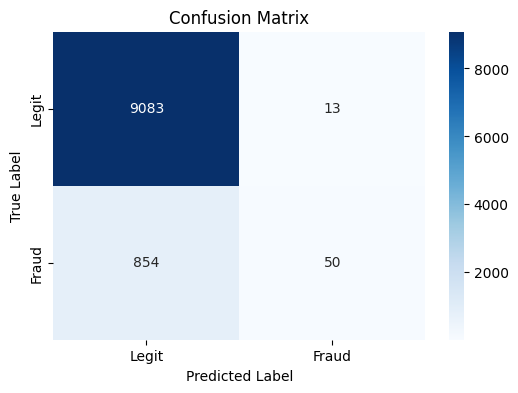

Evaluation at Episode 100: {'accuracy': 0.9133, 'precision': 0.7936507936507936, 'recall': 0.05530973451327434, 'f1': 0.10341261633919338, 'auc_roc': 0.534059936391373}
Episode 101/1000, Steps: 100, Total Reward: 305, Epsilon: 0.0100
Episode 111/1000, Steps: 100, Total Reward: 160, Epsilon: 0.0100
Episode 121/1000, Steps: 100, Total Reward: 155, Epsilon: 0.0100
Episode 131/1000, Steps: 100, Total Reward: 200, Epsilon: 0.0100
Episode 141/1000, Steps: 100, Total Reward: 225, Epsilon: 0.0100
Episode 151/1000, Steps: 100, Total Reward: 325, Epsilon: 0.0100
Episode 161/1000, Steps: 100, Total Reward: 210, Epsilon: 0.0100
Episode 171/1000, Steps: 100, Total Reward: 300, Epsilon: 0.0100
Episode 181/1000, Steps: 100, Total Reward: 275, Epsilon: 0.0100
Episode 191/1000, Steps: 100, Total Reward: 255, Epsilon: 0.0100

📊 **DQN Evaluation Metrics**
Accuracy: 0.9043
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Auc_roc: 0.4998
💰 **Avg Episode Reward:** 260.85


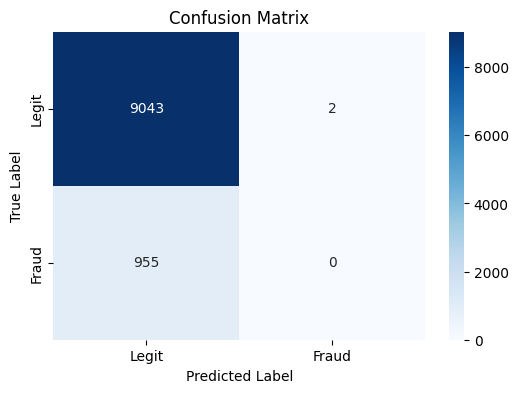

Evaluation at Episode 200: {'accuracy': 0.9043, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'auc_roc': 0.4997788833609729}
Episode 201/1000, Steps: 100, Total Reward: 380, Epsilon: 0.0100
Episode 211/1000, Steps: 100, Total Reward: 180, Epsilon: 0.0100
Episode 221/1000, Steps: 100, Total Reward: 330, Epsilon: 0.0100
Episode 231/1000, Steps: 100, Total Reward: 250, Epsilon: 0.0100
Episode 241/1000, Steps: 100, Total Reward: 80, Epsilon: 0.0100
Episode 251/1000, Steps: 100, Total Reward: 250, Epsilon: 0.0100
Episode 261/1000, Steps: 100, Total Reward: 300, Epsilon: 0.0100
Episode 271/1000, Steps: 100, Total Reward: 300, Epsilon: 0.0100
Episode 281/1000, Steps: 100, Total Reward: 400, Epsilon: 0.0100
Episode 291/1000, Steps: 100, Total Reward: 325, Epsilon: 0.0100

📊 **DQN Evaluation Metrics**
Accuracy: 0.9124
Precision: 1.0000
Recall: 0.0011
F1: 0.0023
Auc_roc: 0.5006
💰 **Avg Episode Reward:** 281.05


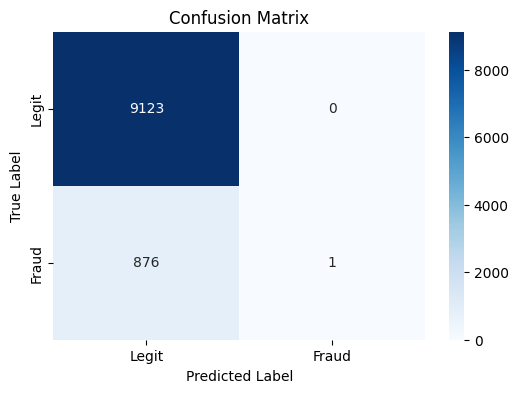

Evaluation at Episode 300: {'accuracy': 0.9124, 'precision': 1.0, 'recall': 0.0011402508551881414, 'f1': 0.002277904328018223, 'auc_roc': 0.500570125427594}
Episode 301/1000, Steps: 100, Total Reward: 180, Epsilon: 0.0100
Episode 311/1000, Steps: 100, Total Reward: 250, Epsilon: 0.0100
Episode 321/1000, Steps: 100, Total Reward: 300, Epsilon: 0.0100
Episode 331/1000, Steps: 100, Total Reward: 250, Epsilon: 0.0100
Episode 341/1000, Steps: 100, Total Reward: 225, Epsilon: 0.0100
Episode 351/1000, Steps: 100, Total Reward: 275, Epsilon: 0.0100
Episode 361/1000, Steps: 100, Total Reward: 375, Epsilon: 0.0100
Episode 371/1000, Steps: 100, Total Reward: 180, Epsilon: 0.0100
Episode 381/1000, Steps: 100, Total Reward: 400, Epsilon: 0.0100
Episode 391/1000, Steps: 100, Total Reward: 350, Epsilon: 0.0100

📊 **DQN Evaluation Metrics**
Accuracy: 0.9106
Precision: 1.0000
Recall: 0.0000
F1: 0.0000
Auc_roc: 0.5000
💰 **Avg Episode Reward:** 276.50


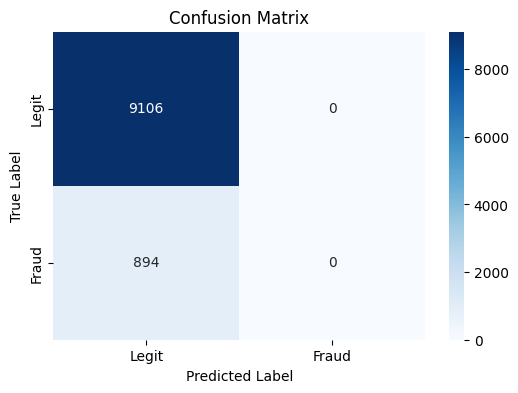

Evaluation at Episode 400: {'accuracy': 0.9106, 'precision': 1.0, 'recall': 0.0, 'f1': 0.0, 'auc_roc': 0.5}
Episode 401/1000, Steps: 100, Total Reward: 280, Epsilon: 0.0100
Episode 411/1000, Steps: 100, Total Reward: 305, Epsilon: 0.0100
Episode 421/1000, Steps: 100, Total Reward: 300, Epsilon: 0.0100
Episode 431/1000, Steps: 100, Total Reward: 250, Epsilon: 0.0100
Episode 441/1000, Steps: 100, Total Reward: 250, Epsilon: 0.0100
Episode 451/1000, Steps: 100, Total Reward: 275, Epsilon: 0.0100
Episode 461/1000, Steps: 100, Total Reward: 255, Epsilon: 0.0100
Episode 471/1000, Steps: 100, Total Reward: 305, Epsilon: 0.0100
Episode 481/1000, Steps: 100, Total Reward: 225, Epsilon: 0.0100
Episode 491/1000, Steps: 100, Total Reward: 275, Epsilon: 0.0100

📊 **DQN Evaluation Metrics**
Accuracy: 0.9107
Precision: 1.0000
Recall: 0.0000
F1: 0.0000
Auc_roc: 0.5000
💰 **Avg Episode Reward:** 276.75


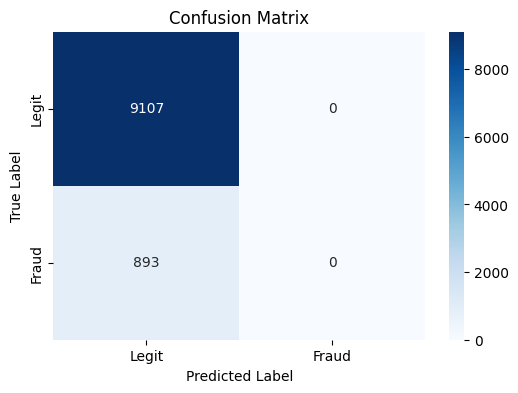

Evaluation at Episode 500: {'accuracy': 0.9107, 'precision': 1.0, 'recall': 0.0, 'f1': 0.0, 'auc_roc': 0.5}
Episode 501/1000, Steps: 100, Total Reward: 275, Epsilon: 0.0100
Episode 511/1000, Steps: 100, Total Reward: 200, Epsilon: 0.0100
Episode 521/1000, Steps: 100, Total Reward: 225, Epsilon: 0.0100
Episode 531/1000, Steps: 100, Total Reward: 305, Epsilon: 0.0100
Episode 541/1000, Steps: 100, Total Reward: 235, Epsilon: 0.0100
Episode 551/1000, Steps: 100, Total Reward: 225, Epsilon: 0.0100
Episode 561/1000, Steps: 100, Total Reward: 205, Epsilon: 0.0100
Episode 571/1000, Steps: 100, Total Reward: 175, Epsilon: 0.0100
Episode 581/1000, Steps: 100, Total Reward: 305, Epsilon: 0.0100
Episode 591/1000, Steps: 100, Total Reward: 230, Epsilon: 0.0100

📊 **DQN Evaluation Metrics**
Accuracy: 0.9093
Precision: 1.0000
Recall: 0.0000
F1: 0.0000
Auc_roc: 0.5000
💰 **Avg Episode Reward:** 273.25


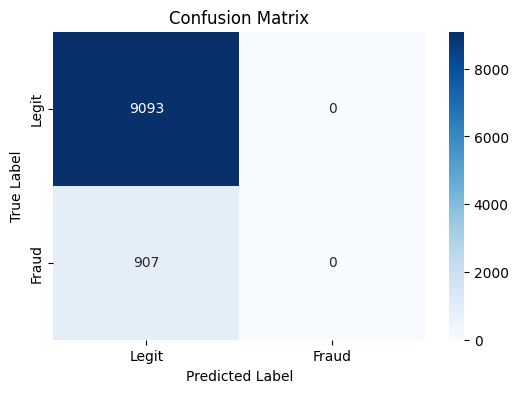

Evaluation at Episode 600: {'accuracy': 0.9093, 'precision': 1.0, 'recall': 0.0, 'f1': 0.0, 'auc_roc': 0.5}
Episode 601/1000, Steps: 100, Total Reward: 200, Epsilon: 0.0100
Episode 611/1000, Steps: 100, Total Reward: 175, Epsilon: 0.0100
Episode 621/1000, Steps: 100, Total Reward: 225, Epsilon: 0.0100
Episode 631/1000, Steps: 100, Total Reward: 300, Epsilon: 0.0100
Episode 641/1000, Steps: 100, Total Reward: 280, Epsilon: 0.0100
Episode 651/1000, Steps: 100, Total Reward: 25, Epsilon: 0.0100
Episode 661/1000, Steps: 100, Total Reward: 180, Epsilon: 0.0100
Episode 671/1000, Steps: 100, Total Reward: 300, Epsilon: 0.0100
Episode 681/1000, Steps: 100, Total Reward: 325, Epsilon: 0.0100
Episode 691/1000, Steps: 100, Total Reward: 375, Epsilon: 0.0100

📊 **DQN Evaluation Metrics**
Accuracy: 0.9075
Precision: 1.0000
Recall: 0.0000
F1: 0.0000
Auc_roc: 0.5000
💰 **Avg Episode Reward:** 268.75


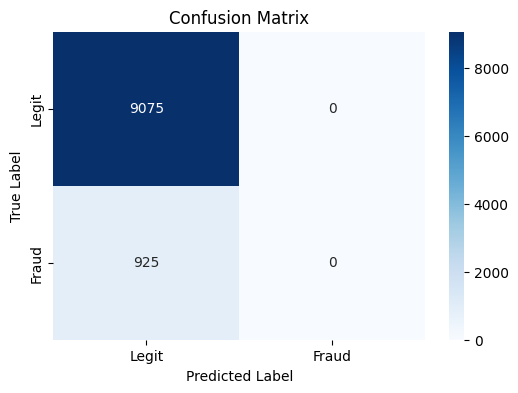

Evaluation at Episode 700: {'accuracy': 0.9075, 'precision': 1.0, 'recall': 0.0, 'f1': 0.0, 'auc_roc': 0.5}
Episode 701/1000, Steps: 100, Total Reward: 230, Epsilon: 0.0100
Episode 711/1000, Steps: 100, Total Reward: 305, Epsilon: 0.0100


In [ ]:
env = FraudDetectionEnv(data, reward_system="paper_reward")
dqn_agent = DQNAgent(state_size=data.shape[1] - 1, action_size=2)

episodes = 1000         # Total number of episodes to train
target_update_freq = 50  # Update target network every 50 episodes
eval_interval = 100      # Evaluate every 100 episodes

for episode in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0
    steps_in_episode = 0

    while not done:
        # Choose an action using epsilon-greedy strategy
        action = dqn_agent.choose_action(state)
        next_state, reward, done, _ = env.step(action)
        dqn_agent.store_experience(state, action, reward, next_state, done)
        dqn_agent.train()
        state = next_state
        total_reward += reward
        steps_in_episode += 1

    # Decay epsilon down to a lower minimum (0.01)
    dqn_agent.epsilon = max(0.01, dqn_agent.epsilon * 0.999)
    
    # Periodically update the target network
    if episode % target_update_freq == 0:
        dqn_agent.target_network.set_weights(dqn_agent.q_network.get_weights())
    
    # Evaluate the agent every 'eval_interval' episodes
    if (episode + 1) % eval_interval == 0:
        eval_metrics = evaluate_model(dqn_agent, env, episodes=100)
        print(f"Evaluation at Episode {episode+1}: {eval_metrics}")

    if episode % 10 == 0 or episode == episodes - 1:
        print(f"Episode {episode+1}/{episodes}, Steps: {steps_in_episode}, Total Reward: {total_reward}, Epsilon: {dqn_agent.epsilon:.4f}")

# Save the trained model
dqn_agent.save_model("dqn_fraud_detector.h5")

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(agent, env, episodes=100):
    """
    Evaluates the trained DQN model over multiple episodes.
    
    :param agent: The trained DQN agent.
    :param env: The FraudDetectionEnv environment.
    :param episodes: Number of episodes to evaluate on.
    :return: Performance metrics (accuracy, precision, recall, f1, auc_roc)
    """
    y_true = []
    y_pred = []
    y_score = []  # for ROC-AUC: probability score for fraud class
    total_rewards = []

    for episode in range(episodes):
        state = env.reset()
        done = False
        episode_reward = 0

        while not done:
            # Retrieve the true label for the current state.
            # Ensure your environment exposes the shuffled index in `env.index_order` and current pointer `env.current_index`
            current_data_index = env.index_order[env.current_index]
            true_label = env.data.loc[current_data_index, 'isFraud']
            y_true.append(true_label)
            
            # Prepare the state input
            state_tensor = np.expand_dims(state, axis=0)
            
            # Get Q-values from the agent
            q_values = agent.q_network.predict(state_tensor, verbose=0)[0]
            
            # *** Numerically Stable Softmax Conversion ***
            q_max = np.max(q_values)
            exp_q = np.exp(q_values - q_max)
            probs = exp_q / np.sum(exp_q)
            
            # Choose the action (greedy policy)
            action = np.argmax(q_values)
            y_pred.append(action)
            
            # Use the probability for the "fraud" class (assumed index 1) as the score for ROC-AUC
            y_score.append(probs[1])
            
            # Execute the action in the environment
            next_state, reward, done, _ = env.step(action)
            episode_reward += reward
            state = next_state

        total_rewards.append(episode_reward)

    # Compute evaluation metrics
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, zero_division=1),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred)
    }
    
    # Compute ROC-AUC using the fraud probability scores
    try:
        metrics['auc_roc'] = roc_auc_score(y_true, y_score)
    except ValueError:
        metrics['auc_roc'] = 0.0

    # Print evaluation metrics
    print("\n📊 **DQN Evaluation Metrics**")
    for key, value in metrics.items():
        print(f"{key.capitalize()}: {value:.4f}")
    print(f"💰 **Avg Episode Reward:** {np.mean(total_rewards):.2f}")
    
    # Plot the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    class_names = ["Legit", "Fraud"]
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
    
    return metrics


/var/folders/qx/19w6xs4j0fxc12b99xqr7x6r0000gn/T/ipykernel_82972/1066139932.py:44: RuntimeWarning: overflow encountered in exp
  exp_q = np.exp(q_values)
/var/folders/qx/19w6xs4j0fxc12b99xqr7x6r0000gn/T/ipykernel_82972/1066139932.py:45: RuntimeWarning: invalid value encountered in divide
  probs = exp_q / np.sum(exp_q)
/var/folders/qx/19w6xs4j0fxc12b99xqr7x6r0000gn/T/ipykernel_82972/1066139932.py:44: RuntimeWarning: overflow encountered in exp
  exp_q = np.exp(q_values)
/var/folders/qx/19w6xs4j0fxc12b99xqr7x6r0000gn/T/ipykernel_82972/1066139932.py:45: RuntimeWarning: invalid value encountered in divide
  probs = exp_q / np.sum(exp_q)
/var/folders/qx/19w6xs4j0fxc12b99xqr7x6r0000gn/T/ipykernel_82972/1066139932.py:44: RuntimeWarning: overflow encountered in exp
  exp_q = np.exp(q_values)
/var/folders/qx/19w6xs4j0fxc12b99xqr7x6r0000gn/T/ipykernel_82972/1066139932.py:45: RuntimeWarning: invalid value encountered in divide
  probs = exp_q / np.sum(exp_q)
/var/folders/qx/19w6xs4j0fxc12b99xqr7


📊 **DQN Evaluation Metrics**
Accuracy: 0.0918
Precision: 0.0905
Recall: 1.0000
F1: 0.1660
Auc_roc: 0.0000
💰 **Avg Episode Reward:** -91.10


/var/folders/qx/19w6xs4j0fxc12b99xqr7x6r0000gn/T/ipykernel_82972/1066139932.py:44: RuntimeWarning: overflow encountered in exp
  exp_q = np.exp(q_values)
/var/folders/qx/19w6xs4j0fxc12b99xqr7x6r0000gn/T/ipykernel_82972/1066139932.py:45: RuntimeWarning: invalid value encountered in divide
  probs = exp_q / np.sum(exp_q)


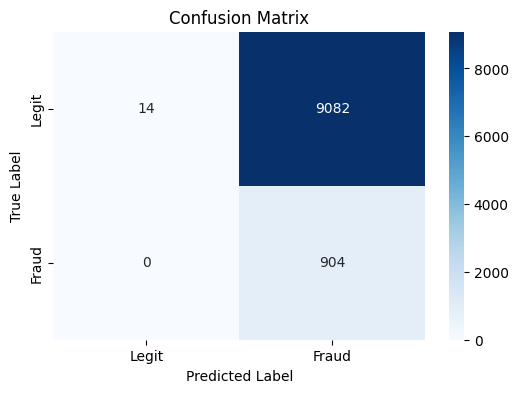

✅ Evaluation results saved to `dqn_evaluation_results.csv`.


In [ ]:
# Evaluate the trained DQN agent
dqn_metrics = evaluate_model(dqn_agent, env, episodes=100)

# Save results
import pandas as pd
df_results = pd.DataFrame([dqn_metrics])
df_results.to_csv("dqn_evaluation_results.csv", index=False)
print("✅ Evaluation results saved to `dqn_evaluation_results.csv`.")
